In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-in-singapore-latest-detailed-data/covid19_sg.csv


In [2]:
df = pd.read_csv('/kaggle/input/covid19-in-singapore-latest-detailed-data/covid19_sg.csv')

In [3]:
df.head()

,Date,Daily_Confirmed,False_Positives_Found,Cumulative_Confirmed,Daily_Discharged,Passed_but_not_due_to_COVID,Cumulative_Discharged,Discharged_to_Isolation,Still_Hospitalised,Daily_Deaths,...,General_Wards_MOH_report,In_Isolation_MOH_report,Total_Completed_Isolation_MOH_report,Total_Hospital_Discharged_MOH_report,Requires_Oxygen_Supplementation,Linked_community_cases,Unlinked_community_cases,Phase,Cumulative_Vaccine_Doses,Cumulative_Individuals_Vaccinated
0,2020-01-23,1,NaN,1,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-24,2,NaN,3,0,0,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-25,1,NaN,4,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-26,0,NaN,4,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-27,1,NaN,5,0,0,0,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,Date,Daily_Confirmed,False_Positives_Found,Cumulative_Confirmed,Daily_Discharged,Passed_but_not_due_to_COVID,Cumulative_Discharged,Discharged_to_Isolation,Still_Hospitalised,Daily_Deaths,...,General_Wards_MOH_report,In_Isolation_MOH_report,Total_Completed_Isolation_MOH_report,Total_Hospital_Discharged_MOH_report,Requires_Oxygen_Supplementation,Linked_community_cases,Unlinked_community_cases,Phase,Cumulative_Vaccine_Doses,Cumulative_Individuals_Vaccinated
628,2021-10-12,2976,0.0,132205,2110,0,104878,25547,1589,11,...,1577.0,25547.0,97259.0,7597.0,291.0,NaN,NaN,Stabilisation Phase,9490422.0,4606968.0
629,2021-10-13,3190,0.0,135395,3215,0,108093,25625,1477,9,...,1461.0,25625.0,100347.0,7724.0,300.0,NaN,NaN,Stabilisation Phase,9518022.0,4609566.0
630,2021-10-14,2932,0.0,138327,3427,0,111520,25111,1481,15,...,1465.0,25111.0,103616.0,7882.0,310.0,NaN,NaN,Stabilisation Phase,9541594.0,4611766.0
631,2021-10-15,3445,0.0,141772,3284,0,114804,25182,1563,8,...,1545.0,25182.0,106741.0,8041.0,322.0,NaN,NaN,Stabilisation Phase,9563625.0,4613735.0
632,2021-10-16,3348,0.0,145120,3429,0,118233,25221,1434,9,...,1402.0,25221.0,110034.0,8177.0,310.0,NaN,NaN,Stabilisation Phase,9598504.0,4616536.0


In [5]:
dates = pd.date_range('2020-01-23','2021-10-16', 
              freq='MS').strftime("%b").tolist()
print(dates)

['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']


In [6]:
print(df.columns)

Index(['Date', 'Daily_Confirmed', 'False_Positives_Found',
       'Cumulative_Confirmed', 'Daily_Discharged',
       'Passed_but_not_due_to_COVID', 'Cumulative_Discharged',
       'Discharged_to_Isolation', 'Still_Hospitalised', 'Daily_Deaths',
       'Cumulative_Deaths', 'Tested_positive_demise', 'Daily_Imported',
       'Daily_Local_transmission', 'Local_cases_residing_in_dorms_MOH_report',
       'Local_cases_not_residing_in_doms_MOH_report',
       'Intensive_Care_Unit_(ICU)', 'General_Wards_MOH_report',
       'In_Isolation_MOH_report', 'Total_Completed_Isolation_MOH_report',
       'Total_Hospital_Discharged_MOH_report',
       'Requires_Oxygen_Supplementation', 'Linked_community_cases',
       'Unlinked_community_cases', 'Phase', 'Cumulative_Vaccine_Doses',
       'Cumulative_Individuals_Vaccinated'],
      dtype='object')


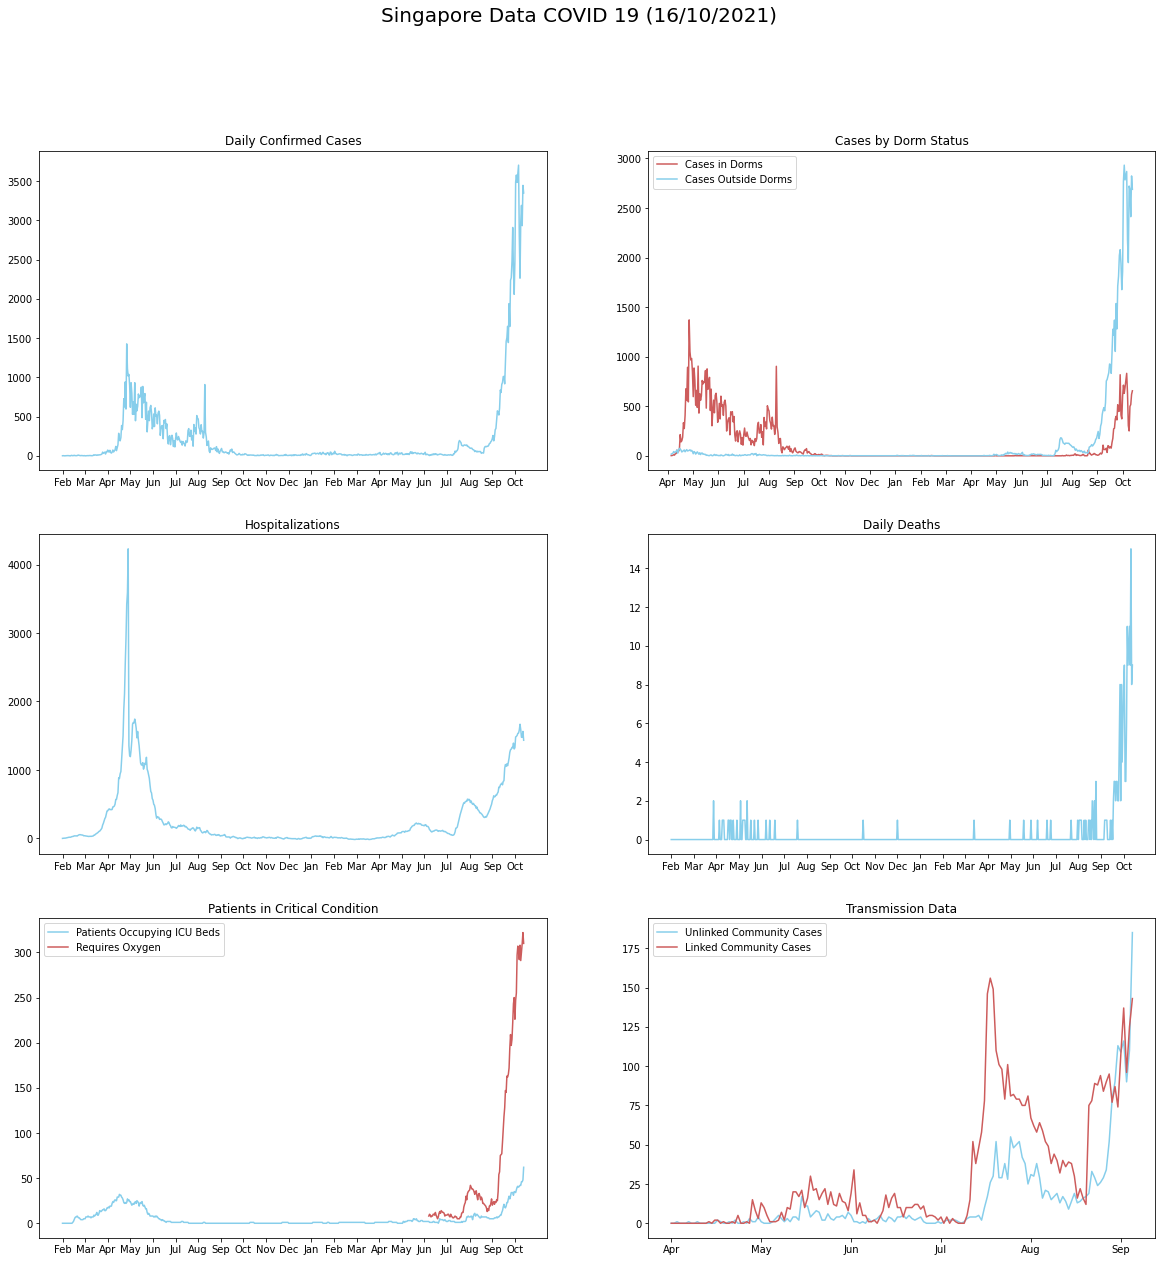

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

plt.setp(axs, xticks=np.arange(0, 632, step=31), xticklabels=dates)
fig.suptitle('Singapore Data COVID 19 (16/10/2021)', size=20)

axs[0, 0].plot(df['Daily_Confirmed'], label='Total Cases', color='SkyBlue')
axs[0, 0].set_title('Daily Confirmed Cases')
axs[1, 0].plot(df['Still_Hospitalised'], color='SkyBlue')
axs[1, 0].set_title('Hospitalizations')
axs[2, 0].plot(df['Intensive_Care_Unit_(ICU)'], color='SkyBlue', label='Patients Occupying ICU Beds')
axs[2, 0].plot(df['Requires_Oxygen_Supplementation'], color='IndianRed', label='Requires Oxygen')
axs[2, 0].legend()
axs[2, 0].set_title('Patients in Critical Condition')
axs[0, 1].plot(df['Local_cases_residing_in_dorms_MOH_report'], label='Cases in Dorms', color='IndianRed')
axs[0, 1].plot(df['Local_cases_not_residing_in_doms_MOH_report'], label='Cases Outside Dorms', color='SkyBlue')
axs[0, 1].legend()
axs[0, 1].set_title('Cases by Dorm Status')
axs[1, 1].plot(df['Daily_Deaths'], color='SkyBlue')
axs[1, 1].set_title("Daily Deaths")
axs[2, 1].plot(df['Unlinked_community_cases'], label='Unlinked Community Cases', color='SkyBlue')
axs[2, 1].plot(df['Linked_community_cases'], label='Linked Community Cases', color='IndianRed')
axs[2, 1].set_title('Transmission Data')
axs[2, 1].legend()


In [8]:
falsePositives = df['False_Positives_Found'].sum() / df['Daily_Confirmed'].sum()
print('False positive rate to date (16/10/2021): ', falsePositives)

False positive rate to date (16/10/2021):  0.0005509641873278236
